#SUMMARY
Data Set Information:

The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.The data set (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.



Attribute Information:

1. Individual identification (ID)
2. Reason for absence (ICD).

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
ab=pd.read_csv('/Users/drram/Documents/Absenteeism_at_work_AAA/Absenteeism_at_work.csv',sep=';')
pd.set_option('Display.max_columns',None)
ab.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [72]:
type(ab)

pandas.core.frame.DataFrame

In [73]:
#checking shape of data
ab.shape

(740, 21)

In [74]:
#info of dataset
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [75]:
#checking datatype
ab.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64



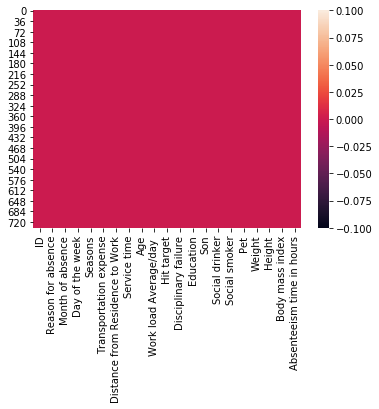

In [76]:
#checking null values/na values
print(ab.isnull().sum())
print("")
sns.heatmap(ab.isnull())

observation-

-data has 740rows and 21 columns.

-data-type is almost int and float, no object datatype is presnet.

-no null/na values are present.

### checking the unique values in the training dataset


In [77]:
for i in ab.columns:
    print(ab[i].value_counts())
    print("\n")

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
6       8
9       8
23      8
27      7
30      7
12      7
7       6
2       6
29      5
26      5
32      5
31      3
19      3
21      3
16      2
8       2
35      1
4       1
Name: ID, dtype: int64


23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64


3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64


2    161
4    156
3    154
6    144
5    125
Name: Day of the week, dtype: int64


4    195
2    192
3    183
1    170
Name: Seasons, dtyp

observation-

-there are 3 absenstees in 0 months in months and 44-->0hour in Absentees time_in_hours has to be filled.

In [78]:
#removing rows where month is zero
ab=ab[ab['Month of absence']!=0]
ab['Month of absence'].value_counts()
#The zero has been ignored in the new dataset

3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
Name: Month of absence, dtype: int64

#### BIVARIATE ANALYSIS

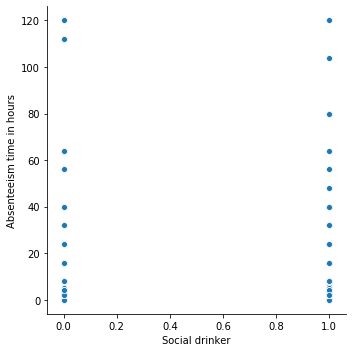

In [79]:
sns.relplot(x="Social drinker", y="Absenteeism time in hours", data=ab)

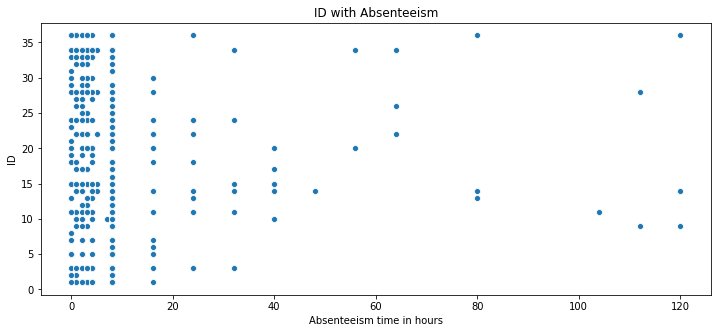

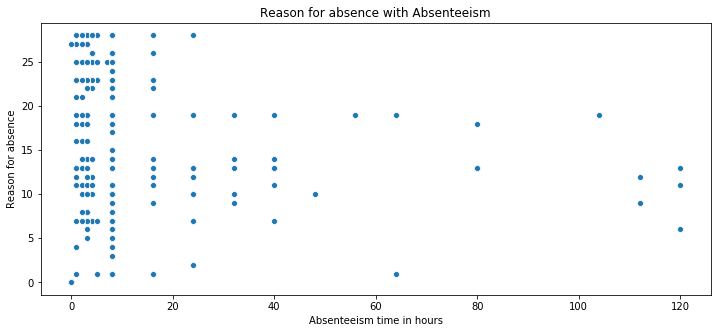

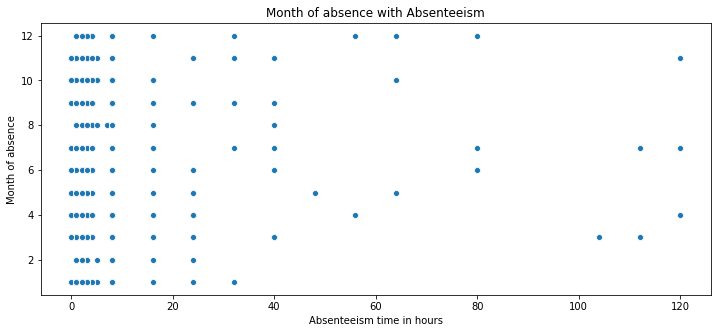

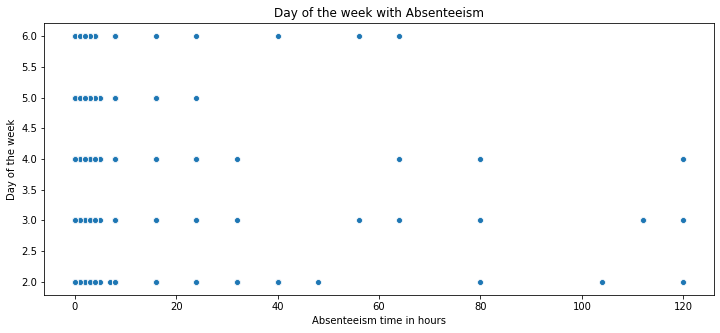

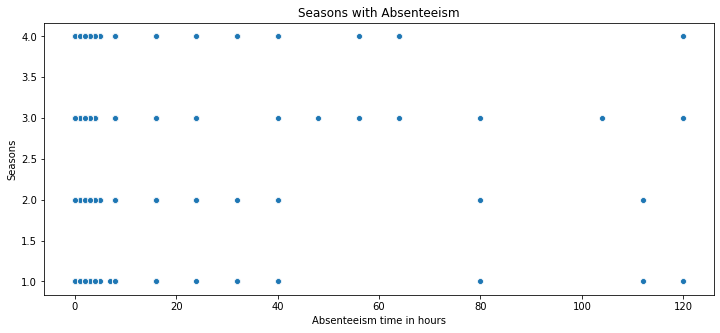

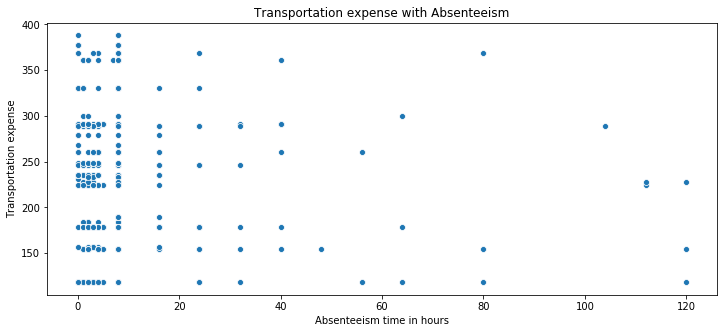

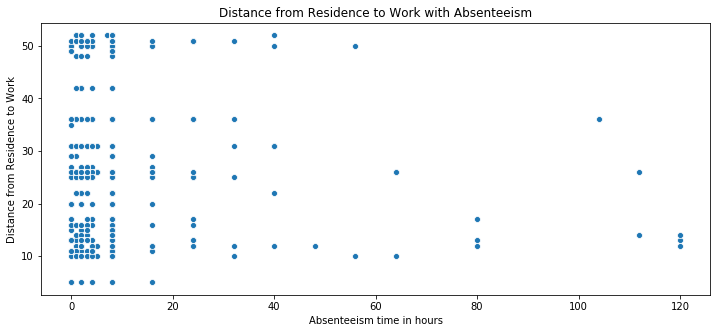

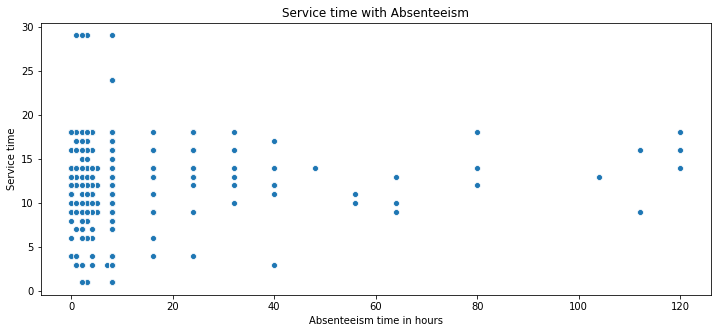

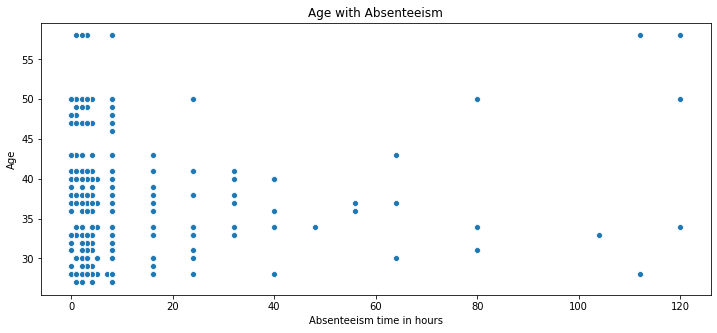

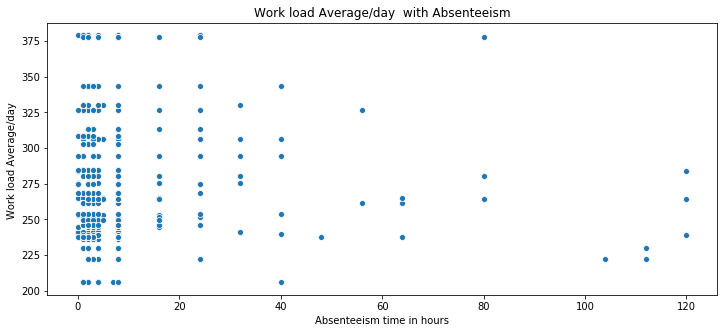

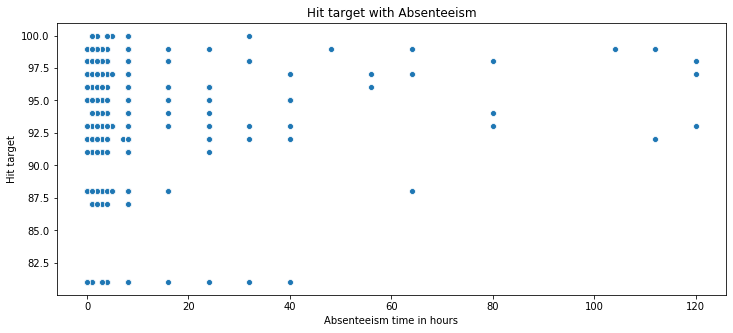

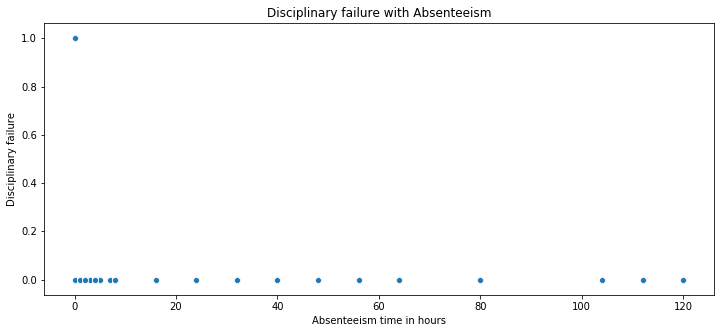

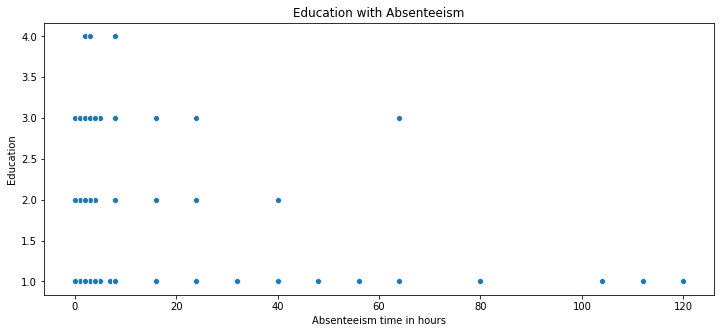

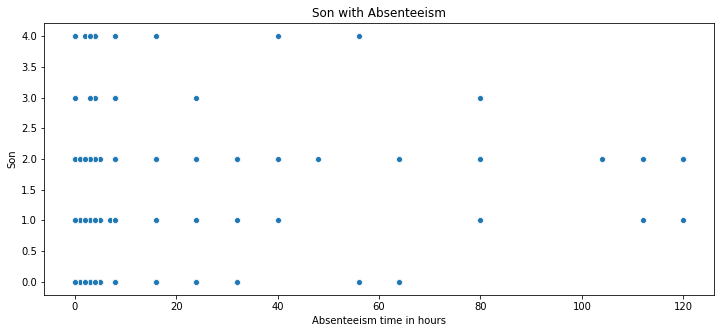

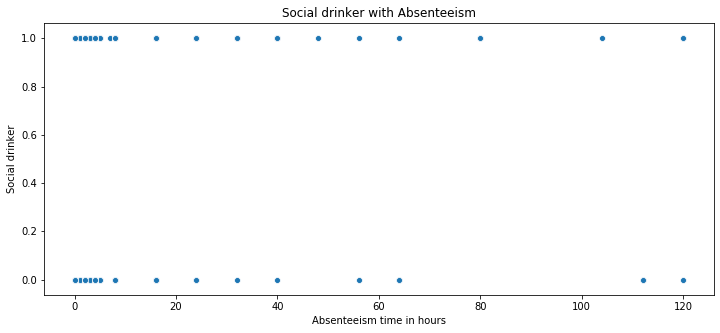

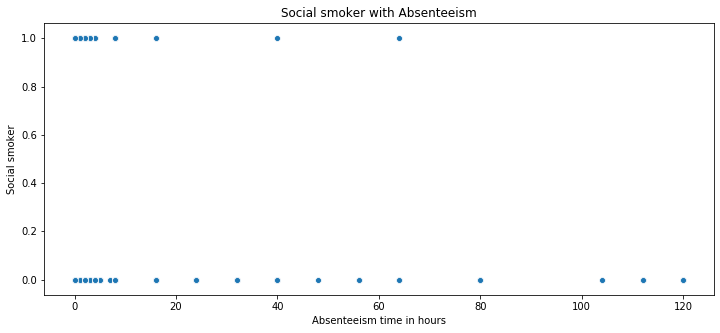

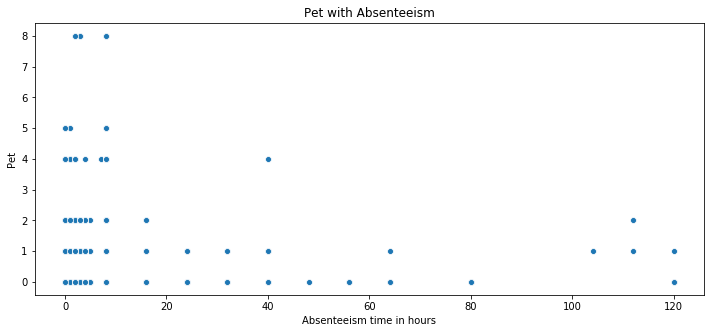

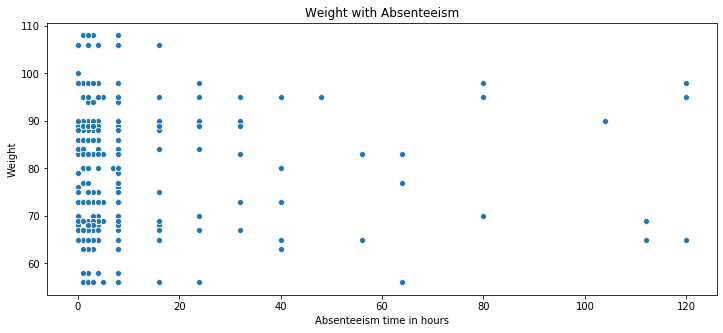

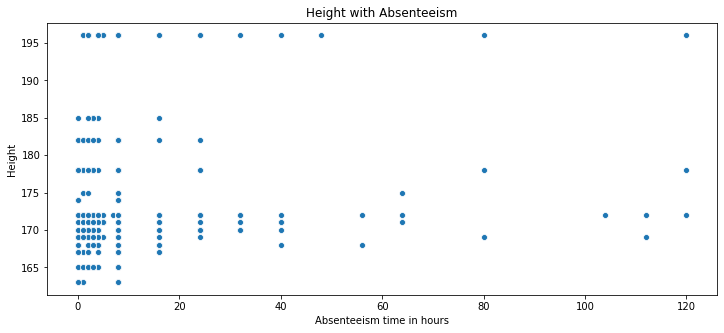

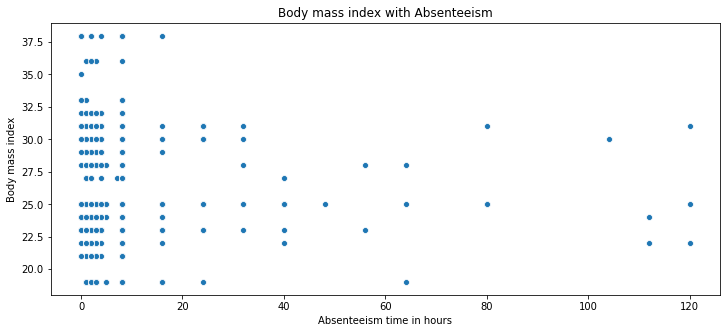

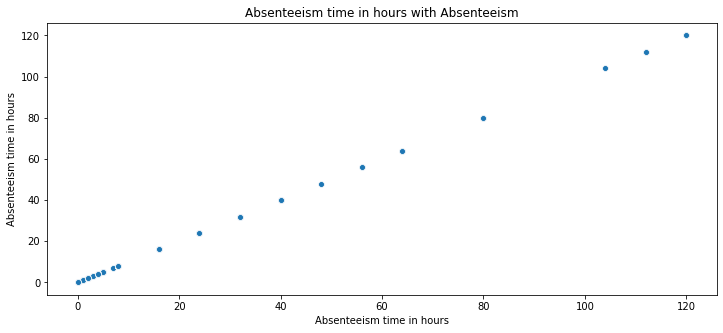

In [80]:
for i in ab.columns:
    if ab[i].dtypes!='O':
        plt.figure(figsize=(12,5))
        plt.title(str(i)+' with '+'Absenteeism')
        sns.scatterplot(x=ab['Absenteeism time in hours'], y=ab[i], data=ab)
        plt.show()

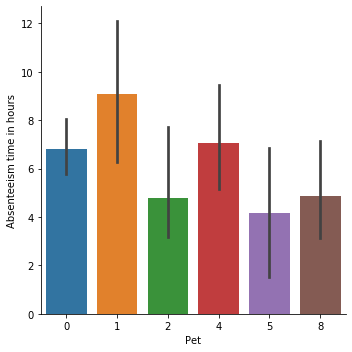

In [81]:
sns.catplot(x="Pet", y="Absenteeism time in hours", kind='bar', data=ab)

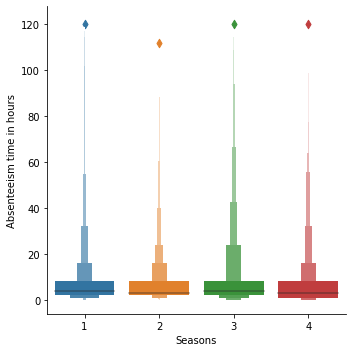

In [82]:
sns.catplot(x="Seasons", y="Absenteeism time in hours", kind="boxen",data=ab)
#Seasons (summer (1), autumn (2), winter (3), spring (4))


#### univariate analysis

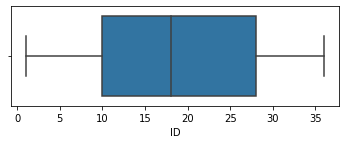

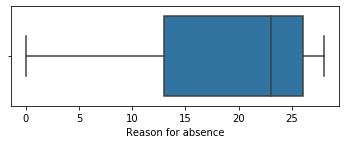

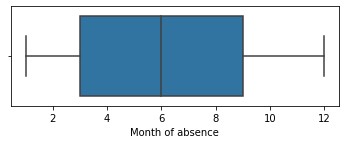

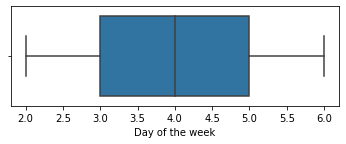

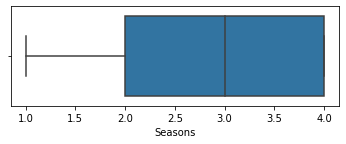

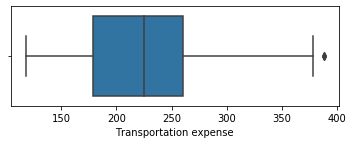

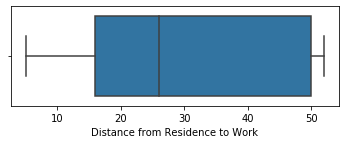

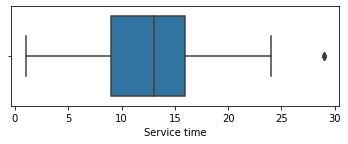

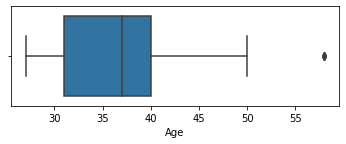

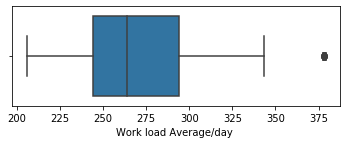

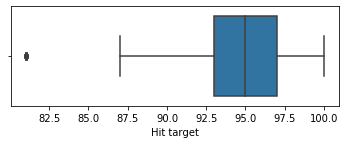

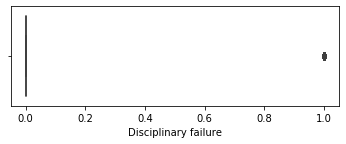

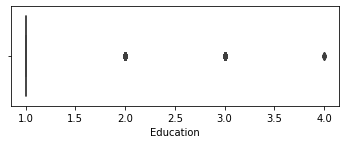

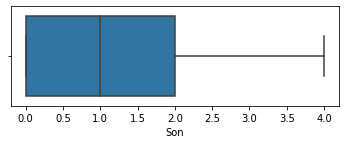

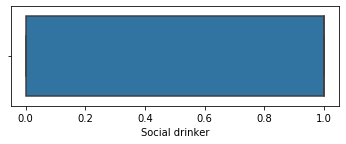

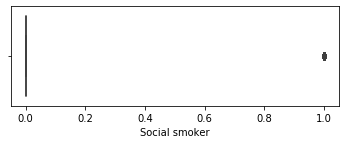

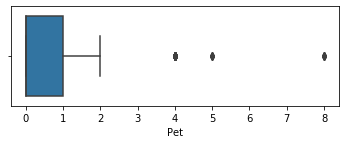

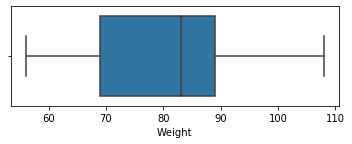

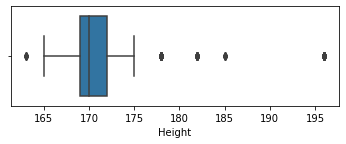

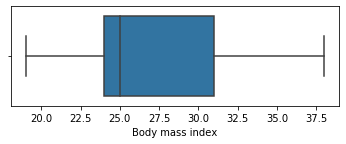

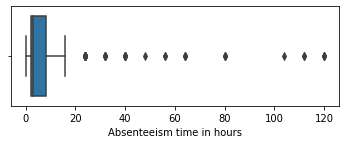

In [83]:
#checking for outliers using boxplot

for i in ab.columns:
    if ab[i].dtypes!='O':
        plt.figure(figsize=(20,15))
        plt.subplot(7,3,21)
        sns.boxplot(ab[i])

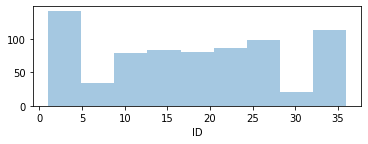

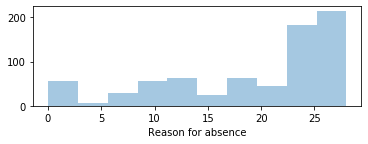

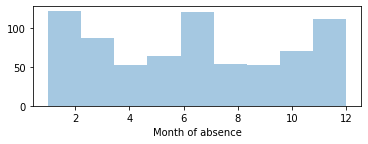

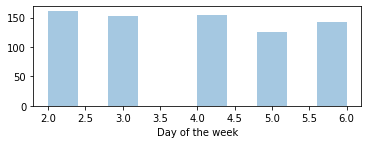

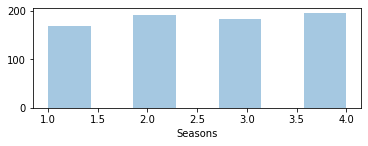

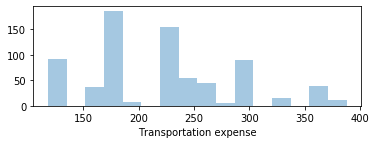

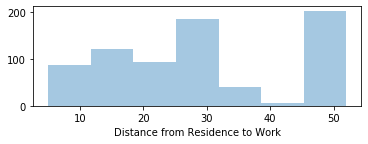

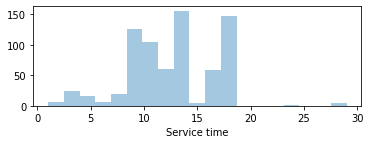

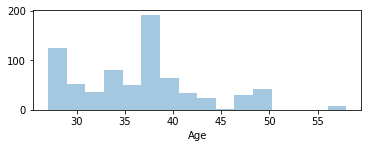

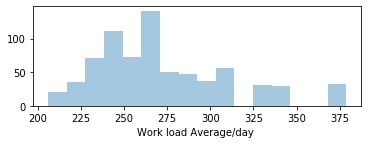

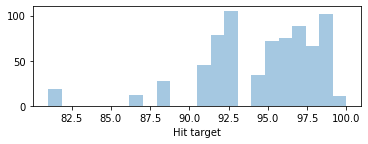

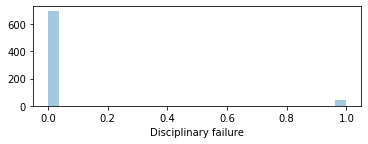

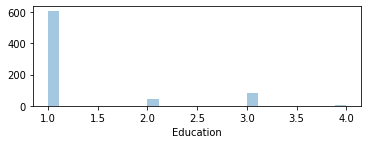

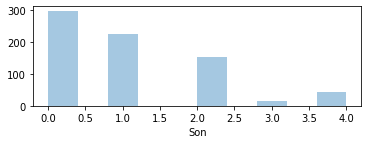

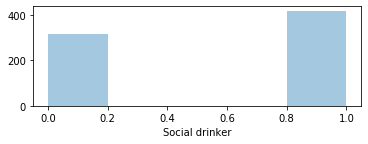

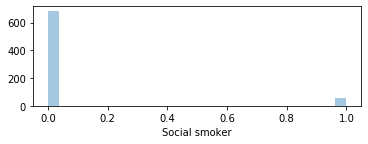

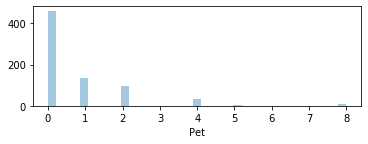

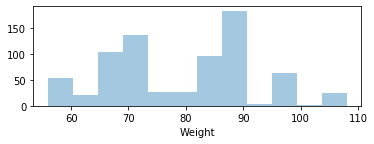

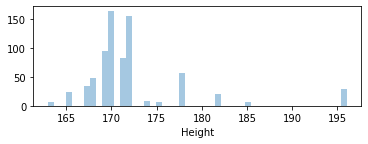

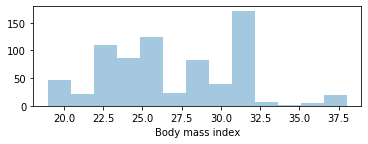

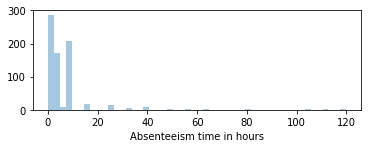

In [84]:
#checking for distribution using distplot

for i in ab.columns:
    if ab[i].dtypes!='O':
        plt.figure(figsize=(20,15))
        plt.subplot(7,3,1)
        sns.distplot(ab[i],kde=False)

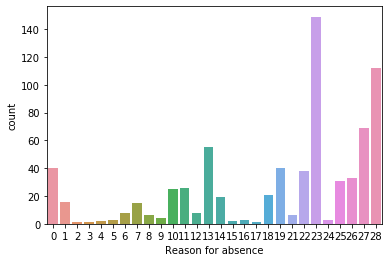

In [85]:
sns.countplot(ab['Reason for absence'])

#### checking correlation

In [17]:
ab.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.00000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,18.027137,19.294437,6.350068,3.913161,2.546811,221.514247,29.624152,12.549525,36.419267,271.491339,94.586160,0.054274,1.29308,1.017639,0.567164,0.073270,0.734057,78.983718,172.116689,26.658073,6.952510
std,11.007622,8.360679,3.419430,1.422090,1.112329,66.960952,14.843701,4.393121,6.461156,39.137634,3.786916,0.226712,0.67435,1.100130,0.495805,0.260756,1.292682,12.866993,6.045341,4.274201,13.350793
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,10.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.00000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.00000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


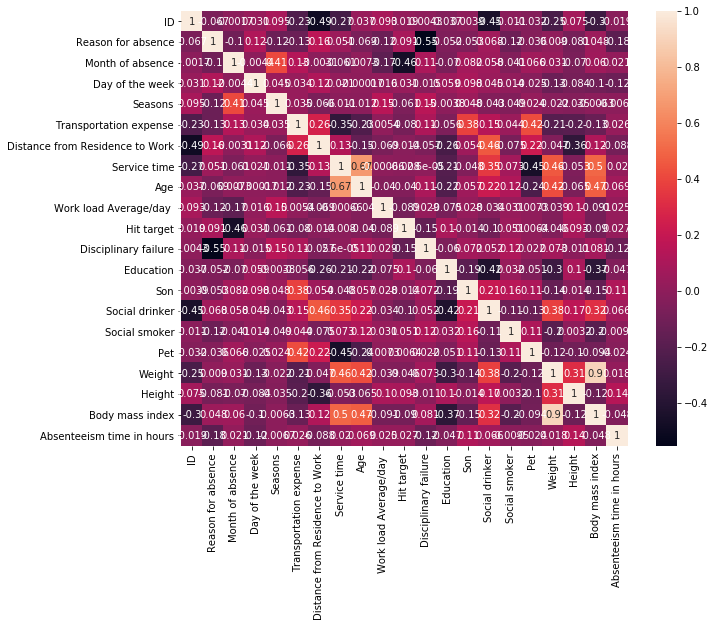

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(ab.corr(), annot=True)

In [19]:
ab.corr()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.067157,-0.001661,0.030529,0.095106,-0.226494,-0.492063,-0.273746,0.037302,0.092754,0.018946,0.004309,-0.036765,0.003887,-0.448699,-0.011108,-0.031957,-0.250996,0.074600,-0.303171,-0.018519
Reason for absence,-0.067157,1.000000,-0.102748,0.120543,-0.123988,-0.127263,0.164906,0.051336,-0.068840,-0.124865,0.090925,-0.553221,-0.051957,-0.053301,0.068152,-0.119597,-0.036494,0.008961,-0.080842,0.048028,-0.179952
Month of absence,-0.001661,-0.102748,1.000000,-0.004358,0.407560,0.133624,-0.003052,-0.061394,0.007308,-0.171228,-0.462852,0.106907,-0.069891,0.081789,0.058240,-0.040996,0.066275,0.030949,-0.070007,0.059889,0.020603
Day of the week,0.030529,0.120543,-0.004358,1.000000,0.044661,0.034014,0.115404,0.020698,-0.000173,0.015682,0.030910,-0.014861,0.059162,0.098248,0.044896,0.013518,-0.025144,-0.128165,-0.083531,-0.102128,-0.124021
Seasons,0.095106,-0.123988,0.407560,0.044661,1.000000,0.034655,-0.065629,-0.010693,-0.012282,0.150664,-0.061035,0.151547,-0.003824,0.047623,-0.043279,-0.049317,0.023789,-0.022446,-0.034961,-0.006345,-0.006666
Transportation expense,-0.226494,-0.127263,0.133624,0.034014,0.034655,1.000000,0.261707,-0.350174,-0.225775,0.005429,-0.080046,0.108782,-0.056390,0.383716,0.146350,0.043672,0.421375,-0.205870,-0.195185,-0.134531,0.026215
Distance from Residence to Work,-0.492063,0.164906,-0.003052,0.115404,-0.065629,0.261707,1.000000,0.131477,-0.149825,-0.068781,-0.013938,-0.056510,-0.259909,0.053906,0.456205,-0.075368,0.218045,-0.046564,-0.355040,0.116527,-0.088307
Service time,-0.273746,0.051336,-0.061394,0.020698,-0.010693,-0.350174,0.131477,1.000000,0.672880,-0.000661,-0.007954,0.000026,-0.212666,-0.047551,0.353875,0.072737,-0.451301,0.456684,-0.053168,0.501195,0.019580
Age,0.037302,-0.068840,0.007308,-0.000173,-0.012282,-0.225775,-0.149825,0.672880,1.000000,-0.039580,-0.039933,0.105954,-0.220955,0.056876,0.217472,0.123677,-0.242845,0.420672,-0.064528,0.474164,0.068590
Work load Average/day,0.092754,-0.124865,-0.171228,0.015682,0.150664,0.005429,-0.068781,-0.000661,-0.039580,1.000000,-0.089444,0.029022,-0.075001,0.027843,-0.033772,0.030965,0.007334,-0.038621,0.103346,-0.091102,0.024748


##Further analysis of data

In [20]:
ab.groupby(['Month of absence'])[['Absenteeism time in hours']].sum()

,Absenteeism time in hours
Month of absence,
1,222
2,294
3,765
4,482
5,400
6,411
7,734
8,288
9,292


In [21]:
ab.groupby(['Seasons']).sum()

,ID,Reason for absence,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
Seasons,,,,,,,,,,,,,,,,,,,,
1,2790,3328,1285,644,38729,5175,2068,6210,42642.803,15661,5,211,177,108,14,136,13551,29090,4567,1241
2,3269,4118,482,740,39692,6084,2481,6844,53436.935,18517,1,249,163,99,14,112,14896,32830,5050,1152
3,3542,3293,841,727,39771,4832,2313,6752,51137.536,17474,13,256,190,103,19,129,14383,31580,4772,1492
4,3685,3481,2072,773,45064,5742,2387,7035,52871.843,18058,21,237,220,108,7,164,15381,33350,5258,1239


In [22]:
#removing the column
#ID column is unique and repetitive and can be removed
ab=ab.drop('ID',axis=1)
ab.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


#### removing outliers

In [23]:
from scipy.stats import zscore
z=np.abs(zscore(ab))
print("The datashape before removing outliers is ", ab.shape)
ab=ab[(z<3).all(axis=1)]
print("The datashape after removing outliers is ", ab.shape)

The datashape before removing outliers is  (737, 20)
The datashape after removing outliers is  (574, 20)


#### Checking the skewness in the datasets

In [24]:
ab.skew()

Reason for absence                -1.013913
Month of absence                   0.112640
Day of the week                    0.084895
Seasons                           -0.019668
Transportation expense             0.325314
Distance from Residence to Work    0.204322
Service time                      -0.148807
Age                                0.503395
Work load Average/day              1.018241
Hit target                        -0.460344
Disciplinary failure               0.000000
Education                          1.984304
Son                                1.452847
Social drinker                    -0.189487
Social smoker                      0.000000
Pet                                1.731443
Weight                            -0.129907
Height                             1.455586
Body mass index                    0.032502
Absenteeism time in hours          3.173433
dtype: float64

In [25]:
#using log1p method to remove the skewness
for i in ab.columns:
    if ab.skew()[i]>0.55:
        ab[i]=np.log1p(ab[i])

In [26]:
ab.skew()

Reason for absence                -1.013913
Month of absence                   0.112640
Day of the week                    0.084895
Seasons                           -0.019668
Transportation expense             0.325314
Distance from Residence to Work    0.204322
Service time                      -0.148807
Age                                0.503395
Work load Average/day              0.669893
Hit target                        -0.460344
Disciplinary failure               0.000000
Education                          1.944621
Son                                0.582118
Social drinker                    -0.189487
Social smoker                      0.000000
Pet                                0.972281
Weight                            -0.129907
Height                             1.372779
Body mass index                    0.032502
Absenteeism time in hours          0.634680
dtype: float64

#### splitting the data into input and output variables
The data will be split into input and output variables. 

In [86]:
x=ab.iloc[:,0:-1]
y=pd.DataFrame(ab.iloc[:,-1])
x.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30


In [87]:
y.head()

,Absenteeism time in hours
0,4
1,0
2,2
3,4
4,2


In [88]:
#We need to scale the data for normalising the input data and for the same we can use Standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.638822,0.802580,0.190199,-0.642562,-1.39155,1.008522,0.429824,0.102611,-0.529563,-0.816581,0.637849,-0.239560,-0.434906,0.893556,0.873589,-0.281181,0.205869,0.856747,-0.019315,0.782414
1,1.633874,-2.309327,0.190199,-0.642562,-1.39155,-1.546940,-1.120707,1.241526,2.103332,-0.816581,0.637849,4.174326,-0.434906,-0.016045,0.873589,-0.281181,-0.568242,1.478916,0.973858,1.016535
2,-1.366085,0.443514,0.190199,0.061105,-1.39155,-0.635342,1.441040,1.241526,0.244818,-0.816581,0.637849,-0.239560,-0.434906,-0.925645,0.873589,-0.281181,-0.568242,0.778976,-0.350373,1.016535
3,-1.002453,-1.471506,0.190199,0.764773,-1.39155,0.859080,-1.660022,0.330394,0.399694,-0.816581,0.637849,-0.239560,-0.434906,0.893556,0.873589,3.556424,-0.568242,-0.854215,-0.681431,-0.622310
4,-0.638822,0.443514,0.190199,0.764773,-1.39155,1.008522,0.429824,0.102611,-0.529563,-0.816581,0.637849,-0.239560,-0.434906,0.893556,0.873589,-0.281181,0.205869,0.856747,-0.019315,0.782414


In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ab.columns:
    le.fit_transform(ab[i])

In [90]:
#Checking the best random state for finalising the train and test data
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at random state", final_r_state)

In [91]:
lr=LinearRegression()
max_r2_score(lr,x,y)

The maximum r2 score 0.20017416090522377 is achieved at random state 55


In [92]:
log =LogisticRegression()
max_r2_score(log,x,y)

The maximum r2 score 0.20828558787341456 is achieved at random state 50


In [93]:
#Finalising the train test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42,test_size=0.20)

In [35]:
#Let us check the performances of other models and to derive at the best parameters for the models, let us use Gridsearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 10}

In [36]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y)
gdd.best_params_

{'criterion': 'mae'}

In [37]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 1, 'kernel': 'rbf'}

In [38]:
score=[]
cv=[]
Mean=[]
Root=[]

from sklearn.model_selection import cross_val_score

models=[LinearRegression(),KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='mae'),SVR(C=1,kernel='rbf')]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    print(i)
    r2score=r2_score(test_y,pred)
    score.append(r2score)
    print("The r2 score is", r2score)
    cscore=cross_val_score(i,x,y,scoring='r2').mean()
    cv.append(cscore)
    print("The cross val score is", cscore)
    meanerror=mean_squared_error(test_y,pred)
    Mean.append(meanerror)
    print("The mean squared error is", meanerror)
    rooterror=np.sqrt(meanerror)
    print("The root mean squared error is", rooterror)
    Root.append(rooterror)
    print("\n")
    print("\n")



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The r2 score is 0.3151151974777787
The cross val score is 0.2125638060790732
The mean squared error is 0.27059771371504376
The root mean squared error is 0.5201900746025858




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
The r2 score is 0.3035389877491954
The cross val score is 0.10912766829239613
The mean squared error is 0.2751714695853806
The root mean squared error is 0.5245678884428407




DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=Non

In [39]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.315115,0.212564,0.270598,0.520190
1,KNeighborsRegressor,0.303539,0.109128,0.275171,0.524568
2,DecisionTreeRegressor,-0.213599,-0.233921,0.479492,0.692454
3,SVR,0.312977,0.174023,0.271442,0.521001


#Lets try Lasso and Ridge

#### Lasso

In [40]:
#Let us check the best parameters for lasso
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gd=GridSearchCV(ls,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'alpha': 0.01}

In [42]:
#Let us check the best r2 score for Lasso
ls=Lasso(alpha=0.01)
max_r2_score(ls,x,y)

The maximum r2 score 0.37671539748953276 is achieved at random state 90


In [43]:
#Let us check the cross val score for lasso
cross=cross_val_score(ls,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.21898764714422964


#### Ridge

In [44]:
#Let us check the best parameters for Ridge
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
gd=GridSearchCV(rd,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'alpha': 0.001}

In [45]:
#Let us check the best r2 score for Ridge
rd=Ridge(alpha=0.001)
max_r2_score(rd,x,y)

The maximum r2 score 0.3832787143956238 is achieved at random state 100


In [46]:
#Let us check the cross val score for Ridge
cross=cross_val_score(rd,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.21257206988540506


Ensemble Techniques


Random Forest

In [47]:
#Let us try to use ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [48]:
#Selecting the best parameters using GridSearchCV
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 50}

In [49]:
#Lets check the r2 score 
rf=RandomForestRegressor(n_estimators=50)
max_r2_score(rf,x,y)

The maximum r2 score 0.5387789646605943 is achieved at random state 93


In [50]:
#Lets check the cross val score
cvscore=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.359774798114599


#### GradientBoostingRegressor

In [51]:
#selecting the best parameters 
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [52]:

#Lets check the r2 score 
gb=GradientBoostingRegressor(n_estimators=50,learning_rate=0.1)
max_r2_score(gb,x,y)

The maximum r2 score 0.5486818482763351 is achieved at random state 93


In [53]:
#Let us check the cross val score for GradientBoosting
cross=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.3795819587750164


In [54]:
#selecting the best parameters
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y)
gad.best_params_

{'learning_rate': 0.001, 'n_estimators': 200}

In [55]:
#Lets check the r2 score 
ad=AdaBoostRegressor(n_estimators=200,learning_rate=0.001)
max_r2_score(ad,x,y)

The maximum r2 score 0.5076369800185063 is achieved at random state 87


In [56]:
#Let us check the cross val score for Adaboost
cross=cross_val_score(ad,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.3268202451021688


In [58]:
result2=pd.DataFrame({'Boosters':['Lasso','Ridge','RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.376,0.383,0.538,0.548,0.507],'Cross_val_score':[0.218,0.212,0.359,0.379,0.326]})
result2

,Boosters,R2 Score,Cross_val_score
0,Lasso,0.376,0.218
1,Ridge,0.383,0.212
2,RandomForestRegressor,0.538,0.359
3,GradientBoostRegressor,0.548,0.379
4,AdaBoostRegressor,0.507,0.326


Since the attributes are not having good positive correlation with the target, the scores are less.

In [94]:
abs_bins = [0, 4, 8, 16, np.inf]
abs_names = ['<4', '8', '16', '16+']
ab['abs_range'] = pd.cut(ab['Absenteeism time in hours'], abs_bins, labels=abs_names)

In [95]:
ab['abs_range']=ab['abs_range'].fillna('<4')

In [96]:
ab['abs_range'].isnull().sum()

0

In [97]:
#type(ab)
y1=ab.iloc[:,-1]
y1

0       <4
1       <4
2       <4
3       <4
4       <4
      ... 
732      8
733      8
734    16+
735      8
736     <4
Name: abs_range, Length: 737, dtype: category
Categories (4, object): [<4 < 8 < 16 < 16+]

In [98]:
ab.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'abs_range'],
      dtype='object')

In [99]:
x1=ab.iloc[:,:-1]
#y1=pd.DataFrame(ab['abs_range'])

In [100]:
x1.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [101]:
#ab['abs_range'].value_counts()

In [102]:
#### deriving the best random_state for splitting the data into train and test
from sklearn.metrics import accuracy_score

def max_acc_score(reg,x1,y1):
    max_acc_score=0
    for r_state in range(42,101):
        train_x1,test_x1,train_y1,test_y1=train_test_split(x1,y1,random_state=r_state,test_size=0.20)
        reg.fit(train_x1,train_y1)
        pred=reg.predict(test_x1)
        acc_score=accuracy_score(test_y1,pred)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print("The max accuracy score ", max_acc_score, "is achieved at", final_r_state)
    return final_r_state

In [103]:
#Checking the decisiontree for the above
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

max_acc_score(dt,x1,y1)

The max accuracy score  1.0 is achieved at 42


42

In [104]:
#We need to finalise the train and test data
train_x1,test_x1,train_y1,test_y1=train_test_split(x1,y1,random_state=42,test_size=0.20)

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_



{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}

In [106]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [107]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 1, 'kernel': 'rbf'}

In [108]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

score=[]
cv=[]



algorithms=[KNeighborsClassifier(algorithm='auto', n_neighbors= 20, weights='distance'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'best'), SVC(C=1, kernel='rbf'), MultinomialNB()]

for i in algorithms:
    print(i)
    i.fit(train_x1,train_y1)
    pred=i.predict(test_x1)
    accscore=accuracy_score(test_y1,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x1,y1,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y1,pred))
    print()
    cm=confusion_matrix(test_y1,pred)
    print(cm)
    print()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')

The accuracy score is  0.6621621621621622

The cross val score is 0.6621897407611693

              precision    recall  f1-score   support

          16       0.00      0.00      0.00         2
         16+       1.00      0.25      0.40         8
           8       0.57      0.34      0.43        47
          <4       0.68      0.88      0.77        91

    accuracy                           0.66       148
   macro avg       0.56      0.37      0.40       148
weighted avg       0.65      0.66      0.63       148


[[ 0  0  0  2]
 [ 0  2  1  5]
 [ 0  0 16 31]
 [ 0  0 11 80]]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=

In [109]:
result=pd.DataFrame({'Model':['KNeighborsClassifier','DecisionTree', 'SVC','MultinomialNB'],'Accuracy Score':score,'Cross_val_score':cv})
result

,Model,Accuracy Score,Cross_val_score
0,KNeighborsClassifier,0.662162,0.662190
1,DecisionTree,1.000000,1.000000
2,SVC,0.628378,0.652638
3,MultinomialNB,0.702703,0.747748


In [110]:
# we can finalise the Decision Tree classifier as it is giving perfect score for accuracy and cross val

dt=DecisionTreeClassifier(criterion= 'entropy', splitter= 'best')
dt.fit(train_x1,train_y1)
pred=dt.predict(test_x1)
score=accuracy_score(test_y1,pred)
cvs=cross_val_score(dt,x1,y1,cv=5).mean()
print("The accuracy score is ", score)
print("The cross validation score is", cvs)

The accuracy score is  1.0
The cross validation score is 1.0


In [111]:
#now we can save the model
from sklearn.externals import joblib
joblib.dump(dt,"Project16_Absenteeism_Classification.pkl")

['Project16_Absenteeism_Classification.pkl']